Data Source: "https://www.kaggle.com/mlg-ulb/creditcardfraud"


**Recommendation from Data Source**

The dataset contains transactions made by credit cards in September 2013 by European cardholders.
This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, we cannot provide the original features and more background information about the data. Features V1, V2, … V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-sensitive learning. Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.

Given the class imbalance ratio, we recommend measuring the accuracy using the Area Under the Precision-Recall Curve (AUPRC). Confusion matrix accuracy is not meaningful for unbalanced classification

In [21]:
import warnings; warnings.simplefilter('ignore')
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [12]:
df = pd.read_csv("creditcard.csv")

In [14]:
df.head(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [15]:
df.corr()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
Time,1.000000,1.173963e-01,-1.059333e-02,-4.196182e-01,-1.052602e-01,1.730721e-01,-6.301647e-02,8.471437e-02,-3.694943e-02,-8.660434e-03,3.061663e-02,-2.476894e-01,1.243481e-01,-6.590202e-02,-9.875682e-02,-1.834533e-01,1.190287e-02,-7.329721e-02,9.043813e-02,2.897530e-02,-5.086602e-02,4.473573e-02,1.440591e-01,5.114236e-02,-1.618187e-02,-2.330828e-01,-4.140710e-02,-5.134591e-03,-9.412688e-03,-0.010596,-0.012323
V1,0.117396,1.000000e+00,4.135835e-16,-1.227819e-15,-9.215150e-16,1.812612e-17,-6.506567e-16,-1.005191e-15,-2.433822e-16,-1.513678e-16,7.388135e-17,2.125498e-16,2.053457e-16,-2.425603e-17,-5.020280e-16,3.547782e-16,7.212815e-17,-3.879840e-16,3.230206e-17,1.502024e-16,4.654551e-16,-2.457409e-16,-4.290944e-16,6.168652e-16,-4.425156e-17,-9.605737e-16,-1.581290e-17,1.198124e-16,2.083082e-15,-0.227709,-0.101347
V2,-0.010593,4.135835e-16,1.000000e+00,3.243764e-16,-1.121065e-15,5.157519e-16,2.787346e-16,2.055934e-16,-5.377041e-17,1.978488e-17,-3.991394e-16,1.975426e-16,-9.568710e-17,6.295388e-16,-1.730566e-16,-4.995814e-17,1.177316e-17,-2.685296e-16,3.284605e-16,-7.118719e-18,2.506675e-16,-8.480447e-17,1.526333e-16,1.634231e-16,1.247925e-17,-4.478846e-16,2.057310e-16,-4.966953e-16,-5.093836e-16,-0.531409,0.091289
V3,-0.419618,-1.227819e-15,3.243764e-16,1.000000e+00,4.711293e-16,-6.539009e-17,1.627627e-15,4.895305e-16,-1.268779e-15,5.568367e-16,1.156587e-15,1.576830e-15,6.310231e-16,2.807652e-16,4.739859e-16,9.068793e-16,8.299445e-16,7.614712e-16,1.509897e-16,3.463522e-16,-9.316409e-16,5.706192e-17,-1.133902e-15,-4.983035e-16,2.686834e-19,-1.104734e-15,-1.238062e-16,1.045747e-15,9.775546e-16,-0.210880,-0.192961
V4,-0.105260,-9.215150e-16,-1.121065e-15,4.711293e-16,1.000000e+00,-1.719944e-15,-7.491959e-16,-4.104503e-16,5.697192e-16,6.923247e-16,2.232685e-16,3.459380e-16,-5.625518e-16,1.303306e-16,2.282280e-16,1.377649e-16,-9.614528e-16,-2.699612e-16,-5.103644e-16,-3.980557e-16,-1.857247e-16,-1.949553e-16,-6.276051e-17,9.164206e-17,1.584638e-16,6.070716e-16,-4.247268e-16,3.977061e-17,-2.761403e-18,0.098732,0.133447
V5,0.173072,1.812612e-17,5.157519e-16,-6.539009e-17,-1.719944e-15,1.000000e+00,2.408382e-16,2.715541e-16,7.437229e-16,7.391702e-16,-5.202306e-16,7.203963e-16,7.412552e-16,5.886991e-16,6.565143e-16,-8.720275e-16,2.246261e-15,1.281914e-16,5.308590e-16,-1.450421e-16,-3.554057e-16,-3.920976e-16,1.253751e-16,-8.428683e-18,-1.149255e-15,4.808532e-16,4.319541e-16,6.590482e-16,-5.613951e-18,-0.386356,-0.094974
V6,-0.063016,-6.506567e-16,2.787346e-16,1.627627e-15,-7.491959e-16,2.408382e-16,1.000000e+00,1.191668e-16,-1.104219e-16,4.131207e-16,5.932243e-17,1.980503e-15,2.375468e-16,-1.211182e-16,2.621312e-16,-1.531188e-15,2.623672e-18,2.015618e-16,1.223814e-16,-1.865597e-16,-1.858755e-16,5.833316e-17,-4.705235e-19,1.046712e-16,-1.071589e-15,4.562861e-16,-1.357067e-16,-4.452461e-16,2.594754e-16,0.215981,-0.043643
V7,0.084714,-1.005191e-15,2.055934e-16,4.895305e-16,-4.104503e-16,2.715541e-16,1.191668e-16,1.000000e+00,3.344412e-16,1.122501e-15,-7.492834e-17,1.425248e-16,-3.536655e-18,1.266462e-17,2.607772e-16,-1.690540e-16,5.869302e-17,2.177192e-16,7.604126e-17,-1.881008e-16,9.379684e-16,-2.027779e-16,-8.898922e-16,-4.387401e-16,7.434913e-18,-3.094082e-16,-9.657637e-16,-1.782106e-15,-2.776530e-16,0.397311,-0.187257
V8,-0.036949,-2.433822e-16,-5.377041e-17,-1.268779e-15,5.697192e-16,7.437229e-16,-1.104219e-16,3.344412e-16,1.000000e+00,4.356078e-16,-2.801370e-16,2.487043e-16,1.839891e-16,-2.921856e-16,-8.599156e-16,4.127777e-16,-5.254741e-16,-2.269549e-16,-3.667974e-16,-3.875186e-16,2.033737e-16,3.892798e-16,2.026927e-16,6.377260e-17,-1.047097e-16,-4.653279e-16,-1.727276e-16,1.299943e-16,-6.200930e-16,-0.103079,0.019875
V9,-0.008660,-1.513678e-16,1.978488e-17,5.568367e-16,6.923247e-16,7.391702e-16,4.131207e-16,1.122501e-15,4.356078e-16,1.000000e+00,-4.642274e-16,1.354680e-16,-1.079314e-15,2.251072e-15,3.784757e-15,

In [16]:
df.shape

(284807, 31)

In [17]:
df.Class.value_counts()

0    284315
1       492
Name: Class, dtype: int64

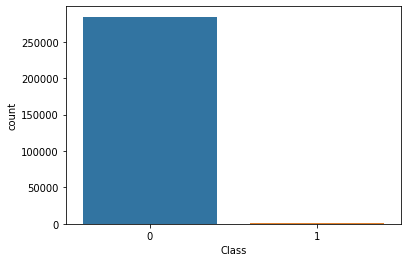

In [18]:
sns.countplot(x='Class', data=df)

Create Independent and dependent features

In [19]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

Visualize correlation with heatmap

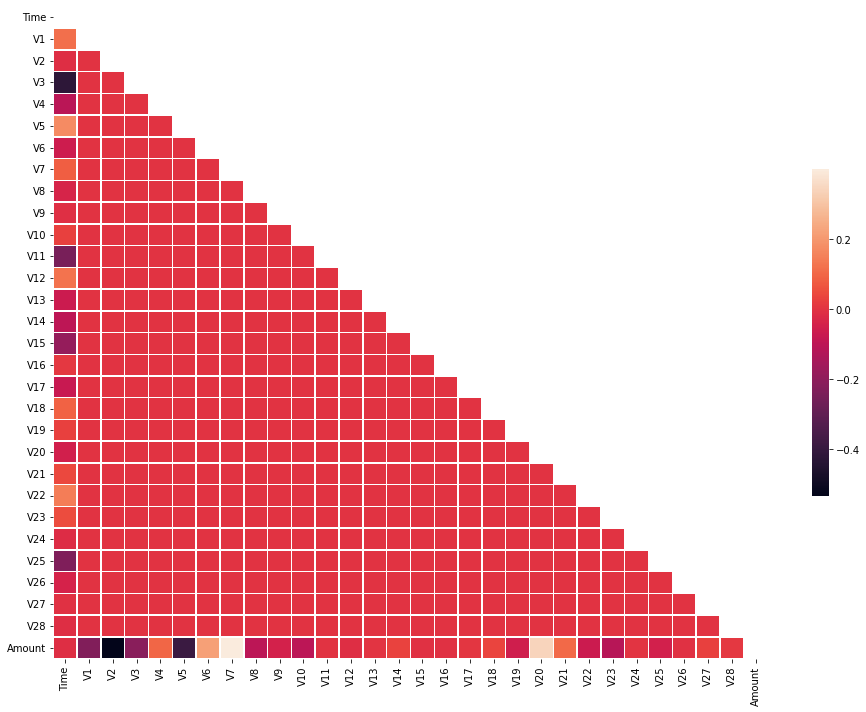

In [22]:
fig, ax = plt.subplots(figsize=(16,12)) 
corr = X.corr()

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

 
sns.heatmap(corr, mask=mask,
            square=False, linewidths=.5, cbar_kws={"shrink": .5})

### Cross Validation: KFold and Hyperparameter Technique: GridSearchCV

In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import KFold
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

In [24]:
log_class = LogisticRegression()
grid = {'C': 10.0 ** np.arange(-2, 3), 'penalty': ['l1', 'l2']}
cv = KFold(n_splits=5, shuffle=False, random_state=None)

Create Train/Test Data

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.7)

In [26]:
clf = GridSearchCV(log_class, grid, cv=cv, n_jobs=-1, scoring='f1_macro')
clf.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
             estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02]),
                         'penalty': ['l1', 'l2']},
             scoring='f1_macro')

In [27]:
prediction = clf.predict(X_test)
print(confusion_matrix(y_test, prediction))
print(accuracy_score(y_test, prediction))
print(classification_report(y_test, prediction))

[[198888    144]
 [    85    248]]
0.9988513530459208
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    199032
           1       0.63      0.74      0.68       333

    accuracy                           1.00    199365
   macro avg       0.82      0.87      0.84    199365
weighted avg       1.00      1.00      1.00    199365



In [28]:
class_weight = dict({0: 1, 1: 100})

In [29]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(class_weight=class_weight)
clf.fit(X_train, y_train)

RandomForestClassifier(class_weight={0: 1, 1: 100})

In [30]:
prediction = clf.predict(X_test)
print(confusion_matrix(y_test, prediction))
print(accuracy_score(y_test, prediction))
print(classification_report(y_test, prediction))

[[199010     22]
 [    84    249]]
0.9994683118902515
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    199032
           1       0.92      0.75      0.82       333

    accuracy                           1.00    199365
   macro avg       0.96      0.87      0.91    199365
weighted avg       1.00      1.00      1.00    199365



### Under Sampling

In [31]:
from imblearn.under_sampling import NearMiss
from collections import Counter

In [32]:
ns = NearMiss(0.8)
X_train_ns, y_train_ns = ns.fit_resample(X_train, y_train)
print("The number of classes before fit {}".format(Counter(y_train)))
print("The number of classes after fit {}".format(Counter(y_train_ns)))

The number of classes before fit Counter({0: 85283, 1: 159})
The number of classes after fit Counter({0: 198, 1: 159})


In [33]:
print("The number of classes before fit {}".format(Counter(y_train)))
print("The number of classes after fit {}".format(Counter(y_train_ns)))

The number of classes before fit Counter({0: 85283, 1: 159})
The number of classes after fit Counter({0: 198, 1: 159})


In [34]:
y_train.value_counts()

0    85283
1      159
Name: Class, dtype: int64

In [35]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
clf.fit(X_train_ns, y_train_ns)

RandomForestClassifier()

In [36]:
prediction = clf.predict(X_test)
print(confusion_matrix(y_test, prediction))
print(accuracy_score(y_test, prediction))
print(classification_report(y_test, prediction))

[[188943  10089]
 [    31    302]]
0.9492388332957139
              precision    recall  f1-score   support

           0       1.00      0.95      0.97    199032
           1       0.03      0.91      0.06       333

    accuracy                           0.95    199365
   macro avg       0.51      0.93      0.52    199365
weighted avg       1.00      0.95      0.97    199365



### Over Sampling

In [37]:
from imblearn.over_sampling import RandomOverSampler

In [38]:
os = RandomOverSampler(0.5)
X_train_os, y_train_os = os.fit_resample(X_train, y_train)
print("The number of classes before fit {}".format(Counter(y_train)))
print("The number of classes after fit {}".format(Counter(y_train_os)))

The number of classes before fit Counter({0: 85283, 1: 159})
The number of classes after fit Counter({0: 85283, 1: 42641})


In [39]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
clf.fit(X_train_os, y_train_os)

RandomForestClassifier()

In [40]:
prediction = clf.predict(X_test)
print(confusion_matrix(y_test, prediction))
print(accuracy_score(y_test, prediction))
print(classification_report(y_test, prediction))

[[199004     28]
 [    72    261]]
0.9994984074436335
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    199032
           1       0.90      0.78      0.84       333

    accuracy                           1.00    199365
   macro avg       0.95      0.89      0.92    199365
weighted avg       1.00      1.00      1.00    199365



### SMOTETomek

In [41]:
from imblearn.combine import SMOTETomek

In [42]:
os = SMOTETomek(0.5)
X_train_os, y_train_os = os.fit_resample(X_train, y_train)
print("The number of classes before fit {}".format(Counter(y_train)))
print("The number of classes after fit {}".format(Counter(y_train_os)))

The number of classes before fit Counter({0: 85283, 1: 159})
The number of classes after fit Counter({0: 84584, 1: 41942})


In [43]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
clf.fit(X_train_os, y_train_os)

RandomForestClassifier()

In [44]:
prediction = clf.predict(X_test)
print(confusion_matrix(y_test, prediction))
print(accuracy_score(y_test, prediction))
print(classification_report(y_test, prediction))

[[198977     55]
 [    56    277]]
0.9994432322624333
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    199032
           1       0.83      0.83      0.83       333

    accuracy                           1.00    199365
   macro avg       0.92      0.92      0.92    199365
weighted avg       1.00      1.00      1.00    199365

